In [1]:
# Import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Apply one-hot encoder
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create feature dataset, X
X = insurance_one_hot.drop("charges", axis=1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [5]:
# Create label dataset, y
y = insurance_one_hot["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [6]:
# Create training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [7]:
# Create NN model
tf.random.set_seed(42)
insurance_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [8]:
# Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [9]:
# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 8677.5078 - mae: 8677.5078
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7880.4692 - mae: 7880.4692
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 7551.2305 - mae: 7551.2305
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7706.9224 - mae: 7706.9224
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7738.9150 - mae: 7738.9150
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7644.3789 - mae: 7644.3789
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7668.4458 - mae: 7668.4458
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7773.5894 - mae: 7773.5894
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7450.0781 - mae: 7450.0781
Epoch 10/100
34/34 [==============================] - 0s 8ms/step - loss: 7722.0620 - mae: 7722.0620

In [10]:
# Check the results
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8735.5615 - mae: 8735.5615


[8735.5615234375, 8735.5615234375]

## Improving the model performance

In [14]:
# Adding extra layer and use Adam optimiser
insurance_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13307.4209 - mae: 13307.4209
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13156.4365 - mae: 13156.4365
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12834.7256 - mae: 12834.7256
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12184.8193 - mae: 12184.8193
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11068.4736 - mae: 11068.4736
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9605.2588 - mae: 9605.2588
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8239.7598 - mae: 8239.7598
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7544.4976 - mae: 7544.4976
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7424.8857 - mae: 7424.8857
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7403.5098 - mae:

In [15]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4861.4912 - mae: 4861.4912


[4861.4912109375, 4861.4912109375]

In [19]:
# Train for longer
insurance_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13306.5039 - mae: 13306.5039
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13186.7207 - mae: 13186.7207
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12920.7627 - mae: 12920.7627
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12363.3252 - mae: 12363.3252
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11364.0742 - mae: 11364.0742
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9952.5068 - mae: 9952.5068
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8506.2773 - mae: 8506.2773
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7635.5635 - mae: 7635.5635
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7445.0820 - mae: 7445.0820
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7420.4639 - mae:

In [20]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3502.7236 - mae: 3502.7236


[3502.7236328125, 3502.7236328125]

Text(0.5, 0, 'epochs')

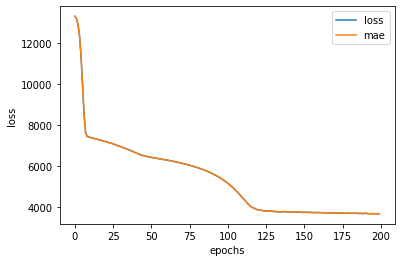

In [22]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")